In [1]:
import psycopg2
import pandas as pd

from sqlalchemy import create_engine, text as sql_text

# Load Connection

In [2]:
# Connection details
host_p='localhost'
database_p='postgres2'
user_p='postgres'
password_p='1201'
port_p = 5432

# #establishing the connection
conn = psycopg2.connect(database=database_p, user=user_p, password=password_p, host=host_p, port=port_p)
#Creating a cursor object using the cursor() method
conn.autocommit = True
cursor = conn.cursor()

connection_string = f'postgresql://{user_p}:{password_p}@{host_p}:{port_p}/{database_p}'
engine_postgresql = create_engine(connection_string)

# Call Database PostgreSQL to Data Frame

In [3]:
q='''
SELECT *
FROM user_transaction
'''

df_all = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df_all

# Save as CSV agar tidak hilang

df_all.to_csv('user_transaction.csv', index=False)

### Data sudah bersih secara huruf kapital, beberapa data processing yang akan saya lakukan adalah

1. Ekstrasi fitur information tanpa ada kodenya
2. Mengubah trx_date menjadi bentuk tanggal seperti biasa

# Data Cleaning

In [121]:
df = pd.read_csv('user_transaction.csv')
df.head(5)

,id,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur
0,1,7401704445091,Direct Deposit,17991695,D,TRANSFER BETWEEN ACCOUNTS TA - 8481169,1692802156000,186202,IDR,22:08:00,8028256018,Dana
1,2,173447095,PayPal,-36599646,C,PAYMENT CC PY - 8919028,1672843756000,546881,IDR,16:14:21,6883569597,Banking Services
2,3,64241,WeChat Pay,-48476424,D,WITHDRAWAL CASH WT - 0794319,1676472556000,43719,IDR,17:59:38,4338400132,OVO
3,4,5649582804,Virtual Account,-33818809,D,UTILITY BILL PAYMENT UI - 1616287,1683730156000,699772,IDR,21:50:11,5294257107,Gopay
4,5,3843221656,PayPal,8414318,C,WITHDRAWAL CASH WT - 7291923,1690382956000,795587,IDR,16:32:18,3753391853,OVO


In [122]:
# Menghapus kode transaksi yang berada di information

df['information'] = df['information'].str[:-13]
df.head(5)

,id,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur
0,1,7401704445091,Direct Deposit,17991695,D,TRANSFER BETWEEN ACCOUNTS,1692802156000,186202,IDR,22:08:00,8028256018,Dana
1,2,173447095,PayPal,-36599646,C,PAYMENT CC,1672843756000,546881,IDR,16:14:21,6883569597,Banking Services
2,3,64241,WeChat Pay,-48476424,D,WITHDRAWAL CASH,1676472556000,43719,IDR,17:59:38,4338400132,OVO
3,4,5649582804,Virtual Account,-33818809,D,UTILITY BILL PAYMENT,1683730156000,699772,IDR,21:50:11,5294257107,Gopay
4,5,3843221656,PayPal,8414318,C,WITHDRAWAL CASH,1690382956000,795587,IDR,16:32:18,3753391853,OVO


In [123]:
# Karena information merupakan track record, maka kalau informatin = GOPAY, ya fiturnya gopay

df['fitur'] = df.apply(lambda row: 'Gopay' if row['information'] == 'GOPAY' else row['fitur'], axis=1)

In [124]:
# Mengembalikan tanggal seperti format biasa

df['trx_date'] = pd.to_datetime(df['trx_date'], unit='ms').dt.date
df.head(5)

,id,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur
0,1,7401704445091,Direct Deposit,17991695,D,TRANSFER BETWEEN ACCOUNTS,2023-08-23,186202,IDR,22:08:00,8028256018,Dana
1,2,173447095,PayPal,-36599646,C,PAYMENT CC,2023-01-04,546881,IDR,16:14:21,6883569597,Banking Services
2,3,64241,WeChat Pay,-48476424,D,WITHDRAWAL CASH,2023-02-15,43719,IDR,17:59:38,4338400132,OVO
3,4,5649582804,Virtual Account,-33818809,D,UTILITY BILL PAYMENT,2023-05-10,699772,IDR,21:50:11,5294257107,Gopay
4,5,3843221656,PayPal,8414318,C,WITHDRAWAL CASH,2023-07-26,795587,IDR,16:32:18,3753391853,OVO


In [125]:
df

,id,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur
0,1,7401704445091,Direct Deposit,17991695,D,TRANSFER BETWEEN ACCOUNTS,2023-08-23,186202,IDR,22:08:00,8028256018,Dana
1,2,173447095,PayPal,-36599646,C,PAYMENT CC,2023-01-04,546881,IDR,16:14:21,6883569597,Banking Services
2,3,64241,WeChat Pay,-48476424,D,WITHDRAWAL CASH,2023-02-15,43719,IDR,17:59:38,4338400132,OVO
3,4,5649582804,Virtual Account,-33818809,D,UTILITY BILL PAYMENT,2023-05-10,699772,IDR,21:50:11,5294257107,Gopay
4,5,3843221656,PayPal,8414318,C,WITHDRAWAL CASH,2023-07-26,795587,IDR,16:32:18,3753391853,OVO
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,897556871671,Direct Deposit,-32838480,C,LOAN REPAYMENT,2023-01-19,738652,IDR,15:32:21,4081103696,Gopay
149996,149997,9966943,Ewallet,34627997,D,INVESTMENT,2022-12-07,315387,IDR,14:55:39,9843219341,Banking Services
149997,149998,11808073749267,Wire Transfer,17480264,D,LOYALTY POINTS REDEMPTION,2023-04-11,400445,IDR,22:22:03,1305264495,Gopay
149998,149999,57378969054986,Venmo,957111,D,BIAYA ADMIN,2023-10-12,170139,IDR,01:37:09,5564770376,Dana


In [126]:
# kalau Credit itu + dan Debit itu -

def transform_amount(row):
    if row['flag_db_cr'] == 'D' and row['amount'] > 0:
        return -row['amount']
    elif row['flag_db_cr'] == 'C' and row['amount'] < 0:
        return -row['amount']
    else:
        return row['amount']

# Terapkan fungsi pada kolom "amount"
df['amount'] = df.apply(transform_amount, axis=1)

In [127]:
df['cif'].value_counts() # CIF ini unique

8028256018    1
4283409954    1
2235262711    1
9350570458    1
3584875249    1
             ..
2222785373    1
4487466588    1
6906937701    1
3939480231    1
4377714381    1
Name: cif, Length: 150000, dtype: int64

In [128]:
df.duplicated().sum()

0

# Penetapan Kategori

In [129]:
df_cat = df.copy()

In [130]:
df_cat['information'].value_counts()

LOYALTY POINTS REDEMPTION    8558
ONLINE SHOPPING              8425
PAYMENT TELCO PASCABAYAR     8402
WITHDRAWAL TRANSFER (ATM)    8399
WITHDRAWAL CASH              8391
LOAN REPAYMENT               8368
DEPOSIT CROSS BORDER         8361
TRANSFER BETWEEN ACCOUNTS    8358
PAYMENT CC                   8352
DEPOSIT TRANSFER (ATM)       8339
INVESTMENT                   8324
GOPAY                        8317
RENT PAYMENT                 8308
REVERSAL                     8289
UTILITY BILL PAYMENT         8252
BIAYA ADMIN                  8241
SALES REFUND                 8179
WITHDRAWAL TRANSFER          8137
Name: information, dtype: int64

In [131]:
df_cat['CATEGORY'] = df_cat.apply(lambda row: 'REVERSAL' if row['information'] == 'REVERSAL' else # melihat transaksi gagal

                                  ('SHOPPING' if row['trx_type'] == 'Ewallet' # Kalau belanja pake gopay/ovo/dana dan ewallet berarti shopping
                                  and (row['fitur'] == 'Gopay' or row['fitur'] == 'OVO' or
                                  row['fitur'] == 'Dana') else

                                 
                                # Kalau information = online shopping dan kalo sales refund (biasanya batal beli)
                                 ('ONLINE SHOPPING' if 'ONLINE SHOPPING' in row['information']
                                  or row['information'] == 'SALES REFUND'
                                  or row['information'] == 'LOYALTY POINTS REDEMPTION' else
                                  
                                # investasi kalau informasinya investment atau transfer type ke crypto
                                  ('INVESTMENT' if 'INVESTMENT' in row['information']
                                   or row['trx_type'] == 'Cryptocurrency' else

                                # Loan Repayment, bisa jadi gali lubang tutup lubang makanya ada credit
                                   ('LOAN REPAYMENT' if 'LOAN REPAYMENT' in row['information'] or
                                    (row['trx_type'] == 'Credit Card' and row['fitur'] == 'Banking Services') else

                                # Pembayaran kebutuhan rumah ada beberapa pake credit car
                                    ('UTILITY BILL PAYMENT' if 'UTILITY BILL PAYMENT' in row['information'] or
                                     row['information'] == 'RENT PAYMENT' or
                                     row['trx_type'] == 'Credit Card' or
                                     row['information'] == 'PAYMENT TELCO PASCABAYAR' else
                                
                                # Transfer, biaya admin
                                     ('TRANSFER' if 'TRANSFER' in row['information'] or
                                      row['trx_type'] in ['Bank Transfer', 'Wire Transfer'] or
                                        row['information'] == 'BIAYA ADMIN' else

                                # Deposit
                                      ('DEPOSIT' if row['information'] == 'DEPOSIT TRANSFER (ATM)' or
                                        row['trx_type'] == 'Direct Deposit' else

                                # Withdraw kalau ada informasinya
                                      ('WITHDRAWAL' if 'WITHDRAWAL' in row['information'] or
                                       row['trx_type'] == 'Cash Withdrawal' else
                                
                                # Game mau pembayarannya appaun, kalo tipenya game berarti gaming
                                       ('GAME' if row['trx_type'] == 'Game' else
                                         
                                # Prepaid Card atau kalau kategorinya pake kartu Credit
                                         ('PREPAID CARD' if row['trx_type'] == 'Prepaid Card' else

                                # Mobile Card Transaction
                                          ('MOBILE CARD TRANSACTION' if row['trx_type'] == 'Google Pay'
                                           or row['trx_type'] == 'Apple Pay'
                                           or row['trx_type'] == 'WeChat Pay' else

                                # Cross Border
                                            ('CROSS BORDER PAYMENTS' if row['information'] == 'DEPOSIT CROSS BORDER' or
                                            row['trx_type'] == 'Venmo' or
                                            row['trx_type'] == 'Zelle' or
                                            row['trx_type'] == 'Western Union' or
                                            row['trx_type'] == 'Alipay' else
                                                 

                                                    'OTHER')))))))))))),
                                axis=1)

In [132]:
# CATEGORY nya udah muncul
df_cat.head(5)

,id,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur,CATEGORY
0,1,7401704445091,Direct Deposit,-17991695,D,TRANSFER BETWEEN ACCOUNTS,2023-08-23,186202,IDR,22:08:00,8028256018,Dana,TRANSFER
1,2,173447095,PayPal,36599646,C,PAYMENT CC,2023-01-04,546881,IDR,16:14:21,6883569597,Banking Services,OTHER
2,3,64241,WeChat Pay,-48476424,D,WITHDRAWAL CASH,2023-02-15,43719,IDR,17:59:38,4338400132,OVO,WITHDRAWAL
3,4,5649582804,Virtual Account,-33818809,D,UTILITY BILL PAYMENT,2023-05-10,699772,IDR,21:50:11,5294257107,Gopay,UTILITY BILL PAYMENT
4,5,3843221656,PayPal,8414318,C,WITHDRAWAL CASH,2023-07-26,795587,IDR,16:32:18,3753391853,OVO,WITHDRAWAL


In [136]:
# setelah dilihat persebaran datanya cukup oke, tidak under/over sampling
df_cat['CATEGORY'].value_counts()

TRANSFER                   39129
UTILITY BILL PAYMENT       25309
ONLINE SHOPPING            24251
INVESTMENT                 13183
LOAN REPAYMENT              8763
REVERSAL                    8289
CROSS BORDER PAYMENTS       7282
WITHDRAWAL                  6130
SHOPPING                    5199
OTHER                       4841
MOBILE CARD TRANSACTION     3655
DEPOSIT                     1617
GAME                        1186
PREPAID CARD                1166
Name: CATEGORY, dtype: int64

# ML Klasifikasi

In [137]:
df_tf = df_cat.copy()

## TF - IDF

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Gabungkan kolom teks menjadi satu kolom
df_tf['text_features'] = df_tf['trx_type'] + df_tf['flag_db_cr'] + df_tf['information'] + df_tf['fitur']

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Ekstraksi fitur teks menggunakan TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(df_tf['text_features'])

# Kolom 'CATEGORY' sebagai target variabel
y = df_tf['CATEGORY']

# Split data menjadi data pelatihan (80%) dan data sisa (20%)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Split sisa data menjadi data validasi (50%) dan data pengujian (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Naive Baiyes

In [139]:
# Inisialisasi model Naive Bayes
naive_bayes_model = MultinomialNB()

# Latih model Naive Bayes menggunakan data pelatihan
naive_bayes_model.fit(X_train_temp, y_train_temp)

# Lakukan prediksi pada data pelatihan, validasi, dan testing
y_pred_train = naive_bayes_model.predict(X_train_temp)
y_pred_val = naive_bayes_model.predict(X_val)
y_pred_test = naive_bayes_model.predict(X_test)

# Evaluasi model Naive Bayes pada setiap tahap
accuracy_train = accuracy_score(y_train_temp, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'Accuracy Train (Naive Bayes): {accuracy_train}')
print(f'Accuracy Validation (Naive Bayes): {accuracy_val}')
print(f'Accuracy Test (Naive Bayes): {accuracy_test}')

print('\nClassification Report Train (Naive Bayes):\n', classification_report(y_train_temp, y_pred_train))
print('\nClassification Report Validation (Naive Bayes):\n', classification_report(y_val, y_pred_val))
print('\nClassification Report Test (Naive Bayes):\n', classification_report(y_test, y_pred_test))

Accuracy Train (Naive Bayes): 0.9785833333333334
Accuracy Validation (Naive Bayes): 0.9774666666666667
Accuracy Test (Naive Bayes): 0.9796666666666667

Classification Report Train (Naive Bayes):
                          precision    recall  f1-score   support

  CROSS BORDER PAYMENTS       0.96      1.00      0.98      5755
                DEPOSIT       1.00      1.00      1.00      1277
                   GAME       1.00      1.00      1.00       943
             INVESTMENT       1.00      1.00      1.00     10569
         LOAN REPAYMENT       0.96      0.94      0.95      6967
MOBILE CARD TRANSACTION       1.00      1.00      1.00      2945
        ONLINE SHOPPING       0.98      1.00      0.99     19391
                  OTHER       1.00      1.00      1.00      3884
           PREPAID CARD       1.00      1.00      1.00       933
               REVERSAL       1.00      1.00      1.00      6673
               SHOPPING       1.00      0.48      0.65      4161
               TRANSFER

Training dan Test tidak jauh berbeda, berarti tidak mengalami overfitting/underfitting

## Segmentation RFM

Kita akan melakukan segmentasi transaksi user, tetapi yang negatif saja (pengeluaran)

In [140]:
df_segmentation = df_cat.copy()

In [177]:
# kita cari yang negatif aja alias pengeluaran konsumen
df_filtered = df_segmentation[df_segmentation['flag_db_cr'] == 'D']

In [178]:
df_filtered

,id,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur,CATEGORY
0,1,7401704445091,Direct Deposit,-17991695,D,TRANSFER BETWEEN ACCOUNTS,2023-08-23,186202,IDR,22:08:00,8028256018,Dana,TRANSFER
2,3,64241,WeChat Pay,-48476424,D,WITHDRAWAL CASH,2023-02-15,43719,IDR,17:59:38,4338400132,OVO,WITHDRAWAL
3,4,5649582804,Virtual Account,-33818809,D,UTILITY BILL PAYMENT,2023-05-10,699772,IDR,21:50:11,5294257107,Gopay,UTILITY BILL PAYMENT
5,6,73599933,Credit Card,-25959481,D,UTILITY BILL PAYMENT,2023-08-19,471856,IDR,03:49:59,4463920587,Dana,UTILITY BILL PAYMENT
6,7,637297,Bank Transfer,-39201617,D,UTILITY BILL PAYMENT,2023-01-04,926991,IDR,05:50:21,547117076,Gopay,UTILITY BILL PAYMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149994,149995,87050326,Wire Transfer,-3610975,D,PAYMENT TELCO PASCABAYAR,2023-09-25,206903,IDR,14:24:08,7626112630,OVO,UTILITY BILL PAYMENT
149996,149997,9966943,Ewallet,-34627997,D,INVESTMENT,2022-12-07,315387,IDR,14:55:39,9843219341,Banking Services,INVESTMENT
149997,149998,11808073749267,Wire Transfer,-17480264,D,LOYALTY POINTS REDEMPTION,2023-04-11,400445,IDR,22:22:03,1305264495,Gopay,ONLINE SHOPPING
149998,149999,57378969054986,Venmo,-957111,D,BIAYA ADMIN,2023-10-12,170139,IDR,01:37:09,5564770376,Dana,TRANSFER


In [142]:
# Tabel R dengan transaksi maksimal setiap nasabah

df_filtered['trx_date'] = pd.to_datetime(df_filtered['trx_date'])
recency_df = df_filtered.groupby('account_number')['trx_date'].max().reset_index()
recency_df['Recency'] = (pd.to_datetime('2023-12-06') - recency_df['trx_date']).dt.days # transaksi terakhir dari hari ini

C:\Users\asusz\AppData\Local\Temp\ipykernel_9156\703319021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['trx_date'] = pd.to_datetime(df_filtered['trx_date'])


In [143]:
# Tabel f dengan banyaknya nasabah transaksi

frequency_df = df_filtered.groupby('account_number').size().reset_index(name='Frequency')

In [144]:
# Tabel m dengan total transaksi negatif (pengeluaran nasabah)

monetary_df = df_filtered.groupby('account_number')['amount'].sum().reset_index()
monetary_df.columns = ['account_number', 'Monetary']
monetary_df

,account_number,Monetary
0,3,-14951767
1,31,-20777120
2,37,-19539737
3,54,-37181433
4,57,-9023166
...,...,...
74634,99967342178197,-48145705
74635,99972191331158,-1911036
74636,99979391475646,-42653780
74637,99980036062109,-46176615


In [145]:
# Import library
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 2. Gabungkan data untuk pelatihan model
rfm_df = pd.merge(recency_df[['account_number', 'Recency']], frequency_df, on='account_number')
rfm_df = pd.merge(rfm_df, monetary_df, on='account_number')
rfm_df

,account_number,Recency,Frequency,Monetary
0,3,97,1,-14951767
1,31,213,1,-20777120
2,37,35,1,-19539737
3,54,63,1,-37181433
4,57,146,1,-9023166
...,...,...,...,...
74634,99967342178197,348,1,-48145705
74635,99972191331158,78,1,-1911036
74636,99979391475646,75,1,-42653780
74637,99980036062109,336,1,-46176615


In [146]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
# Standardisasi data
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)

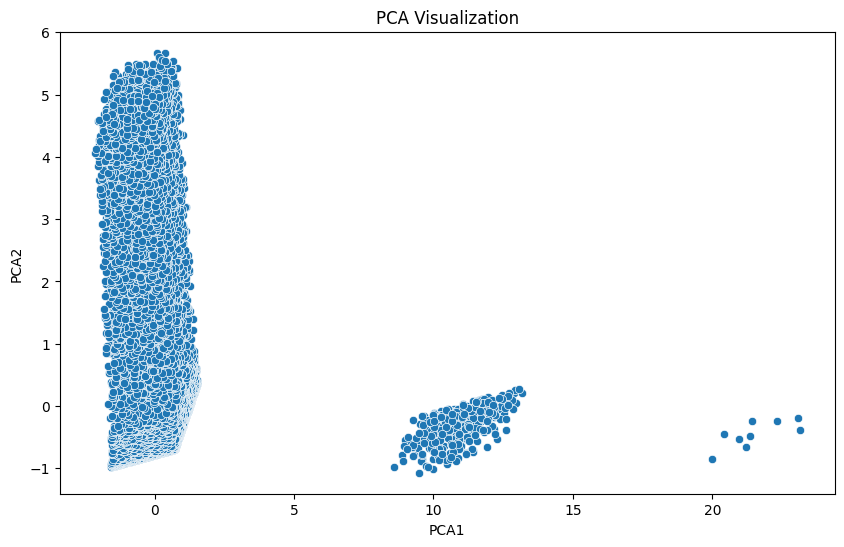

In [148]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(rfm_df_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Visualisasi PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title('PCA Visualization')
plt.show()


C:\Users\asusz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asusz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asusz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

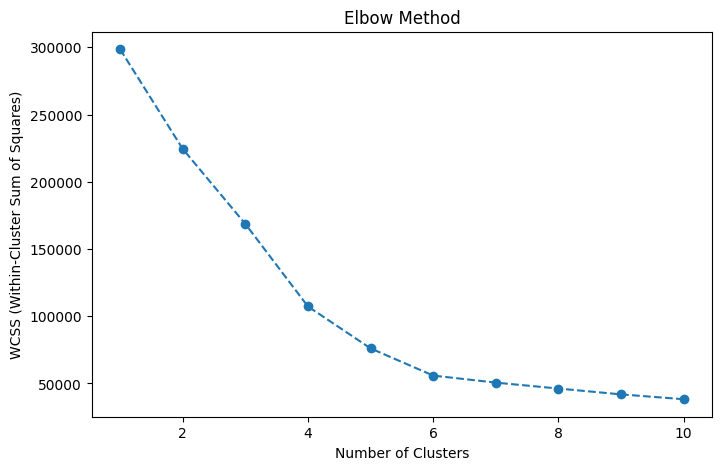

In [149]:
# Elbow Method untuk menentukan jumlah kluster yang optimal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [150]:
# K-means Clustering dengan jumlah kluster yang optimal
k = 3 # Ganti dengan jumlah kluster yang optimal dari Elbow Method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_df_scaled)

C:\Users\asusz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


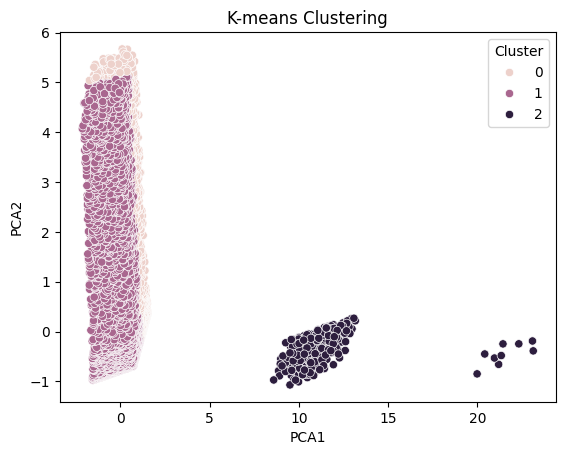

In [151]:
# Visualisasi Klastering
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pd.concat([pca_df, rfm_df['Cluster']], axis=1))
plt.title('K-means Clustering')
plt.show()

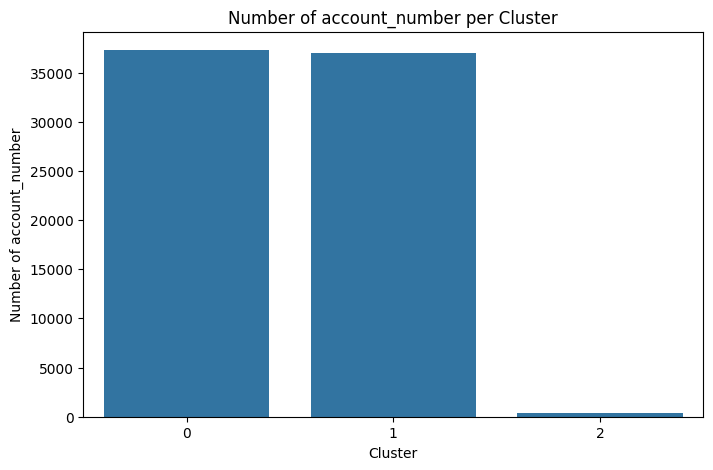

In [152]:
# Visualisasi jumlah account_number per klaster
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=rfm_df)
plt.title('Number of account_number per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of account_number')
plt.show()

In [153]:
# Menampilkan rincian median untuk setiap R, F, dan M per klaster
cluster_medians = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].median()

# Menampilkan tabel rincian median
print('Median values for each cluster:')
print(cluster_medians)


Median values for each cluster:
         Recency  Frequency    Monetary
Cluster                                
0           93.0        1.0 -25251839.0
1          275.0        1.0 -24740598.0
2          113.0        2.0 -48950517.0


# Time Series

Membuat time series model group by tanggal dan jumlah transaksi

In [155]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [154]:
df_t = df_cat.copy()

In [156]:
df_t['trx_date'] = pd.to_datetime(df_t['trx_date'])

In [157]:
# Group by 'trx_date' and count the number of transactions
daily_transactions = df_t.groupby('trx_date').size().reset_index(name='count')
daily_transactions

,trx_date,count
0,2022-12-05,390
1,2022-12-06,450
2,2022-12-07,402
3,2022-12-08,415
4,2022-12-09,431
...,...,...
360,2023-11-30,388
361,2023-12-01,375
362,2023-12-02,415
363,2023-12-03,398


In [ ]:
292 train dan 73 tes

In [158]:
daily_transactions.set_index('trx_date', inplace=True)

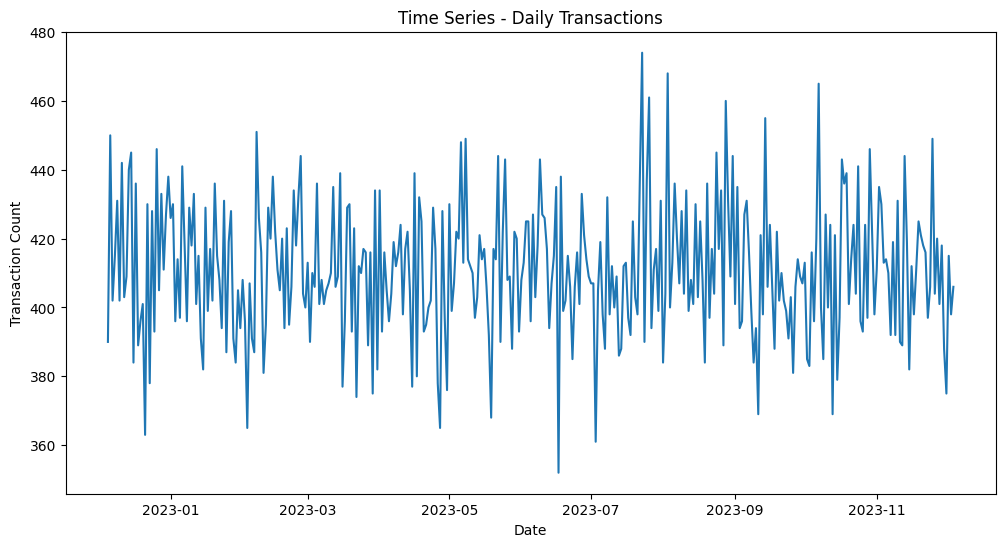

In [159]:
plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['count'])
plt.title('Time Series - Daily Transactions')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()

In [160]:
# Pisahkan data menjadi training dan testing set
train_size = int(len(daily_transactions) * 0.8)
train, test = daily_transactions.iloc[:train_size], daily_transactions.iloc[train_size:]

In [174]:
test

,count
trx_date,
2023-09-23,399
2023-09-24,391
2023-09-25,403
2023-09-26,381
2023-09-27,406
...,...
2023-11-30,388
2023-12-01,375
2023-12-02,415


## Exponential Smoothing

C:\Users\asusz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


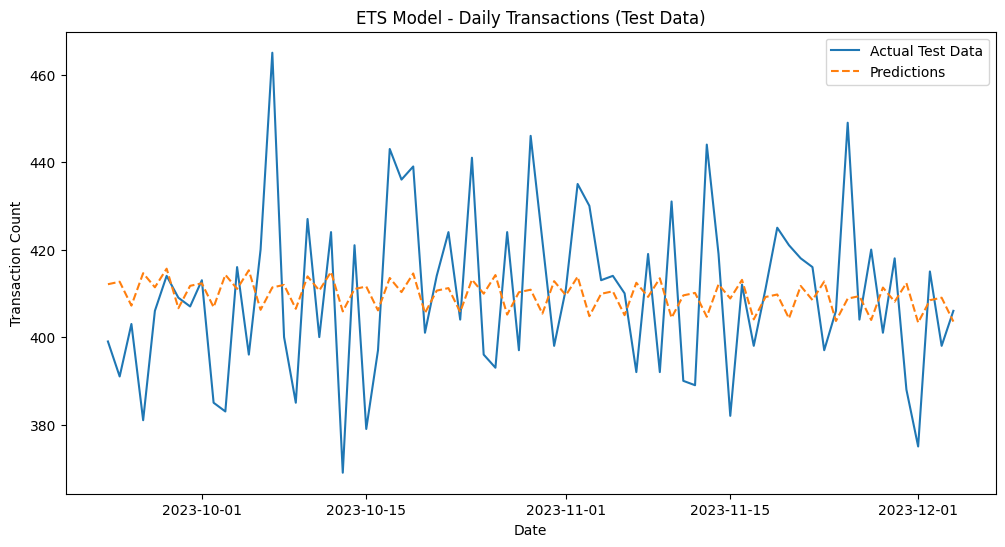

In [161]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Inisialisasi model ETS
model = ExponentialSmoothing(train['count'], trend='add', seasonal='add', seasonal_periods=7)

# Latih model
fitted_model = model.fit()

# Prediksi menggunakan set pengujian
predictions = fitted_model.forecast(len(test))

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['count'], label='Actual Test Data')
plt.plot(test.index, predictions, label='Predictions', linestyle='dashed')
plt.title('ETS Model - Daily Transactions (Test Data)')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend()
plt.show()

In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prediksi menggunakan set pelatihan
train_predictions = fitted_model.fittedvalues

# Mengukur performa model pelatihan menggunakan MAE dan RMSE
train_mae = mean_absolute_error(train['count'], train_predictions)
train_rmse = np.sqrt(mean_squared_error(train['count'], train_predictions))
print(f'Training Mean Absolute Error (MAE): {train_mae}')
print(f'Training Root Mean Squared Error (RMSE): {train_rmse}')

# Prediksi menggunakan set pengujian
test_predictions = fitted_model.forecast(len(test))

# Mengukur performa model pengujian menggunakan MAE dan RMSE
mae = mean_absolute_error(test['count'], test_predictions)
rmse = np.sqrt(mean_squared_error(test['count'], test_predictions))
print(f'\nTest Mean Absolute Error (MAE): {mae}')
print(f'Test Root Mean Squared Error (RMSE): {rmse}')

# Membuat dataframe evaluasi untuk pelatihan
train_evaluation_df = pd.DataFrame({
    'Date': train.index,
    'Actual': train['count'],
    'Predicted': train_predictions,
    'Error': train['count'] - train_predictions
})

# Membuat dataframe evaluasi untuk pengujian
evaluation_df = pd.DataFrame({
    'Date': test.index,
    'Actual': test['count'],
    'Predicted': test_predictions,
    'Error': test['count'] - test_predictions
})

# Tampilkan dataframe evaluasi
print('\nTraining Evaluation:')
print(train_evaluation_df)

print('\nTest Evaluation:')
print(evaluation_df)

Training Mean Absolute Error (MAE): 16.266573942244857
Training Root Mean Squared Error (RMSE): 20.330056468395767

Test Mean Absolute Error (MAE): 15.473939116121045
Test Root Mean Squared Error (RMSE): 19.189574667139382

Training Evaluation:
                 Date  Actual   Predicted      Error
trx_date                                            
2022-12-05 2022-12-05     390  410.089583 -20.089583
2022-12-06 2022-12-06     450  417.793529  32.206471
2022-12-07 2022-12-07     402  412.928570 -10.928570
2022-12-08 2022-12-08     415  413.012555   1.987445
2022-12-09 2022-12-09     431  411.054828  19.945172
...               ...     ...         ...        ...
2023-09-18 2023-09-18     388  410.513584 -22.513584
2023-09-19 2023-09-19     422  415.438974   6.561026
2023-09-20 2023-09-20     402  413.436501 -11.436501
2023-09-21 2023-09-21     410  416.929089  -6.929089
2023-09-22 2023-09-22     402  407.224534  -5.224534

[292 rows x 4 columns]

Test Evaluation:
                 Date  A

## ARIMA

In [165]:
from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Misalnya, bagi data menjadi 80% pelatihan dan 20% pengujian
train_size = int(len(daily_transactions) * 0.8)
train, test = daily_transactions[:train_size], daily_transactions[train_size:]

# Gunakan fungsi auto_arima untuk menentukan nilai p, d, q secara otomatis
autoarima_model = auto_arima(train['count'], seasonal=True, m=12)  # Mungkin perlu disesuaikan dengan periode musiman

# Latih model ARIMA dengan parameter terbaik dari auto_arima
fitted_autoarima_model = autoarima_model.fit(train['count'])

In [176]:
# Prediksi menggunakan set pengujian
test_predictions_autoarima = fitted_autoarima_model.predict(n_periods=len(test))

# Mengukur performa model pengujian ARIMA menggunakan MAE dan RMSE
mae_autoarima = mean_absolute_error(test['count'], test_predictions_autoarima)
rmse_autoarima = np.sqrt(mean_squared_error(test['count'], test_predictions_autoarima))
print(f'Test AutoARIMA Mean Absolute Error (MAE): {mae_autoarima}')
print(f'Test AutoARIMA Root Mean Squared Error (RMSE): {rmse_autoarima}')

# Membuat dataframe evaluasi untuk pengujian AutoARIMA
evaluation_df_autoarima = pd.DataFrame({
    'Date': test.index,
    'Actual': test['count'],
    'Predicted': test_predictions_autoarima,
    'Error': test['count'] - test_predictions_autoarima
})

# Tampilkan dataframe evaluasi AutoARIMA
print('\nTest Evaluation AutoARIMA:')
print(evaluation_df_autoarima)

Test AutoARIMA Mean Absolute Error (MAE): 15.172883548430562
Test AutoARIMA Root Mean Squared Error (RMSE): 18.92427772535839

Test Evaluation AutoARIMA:
                 Date  Actual   Predicted      Error
2023-09-23 2023-09-23     399  414.475083 -15.475083
2023-09-24 2023-09-24     391  405.827306 -14.827306
2023-09-25 2023-09-25     403  413.009267 -10.009267
2023-09-26 2023-09-26     381  405.879852 -24.879852
2023-09-27 2023-09-27     406  413.727784  -7.727784
...               ...     ...         ...        ...
2023-11-30 2023-11-30     388  411.229514 -23.229514
2023-12-01 2023-12-01     375  411.229514 -36.229514
2023-12-02 2023-12-02     415  411.229514   3.770486
2023-12-03 2023-12-03     398  411.229514 -13.229514
2023-12-04 2023-12-04     406  411.229514  -5.229514

[73 rows x 4 columns]


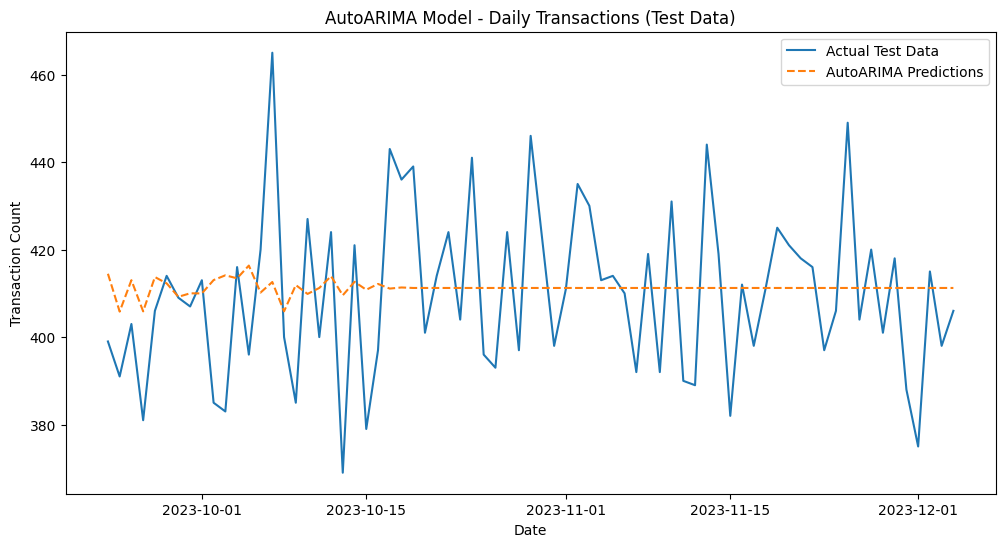

In [170]:
# Visualisasi hasil prediksi AutoARIMA
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['count'], label='Actual Test Data')
plt.plot(test.index, test_predictions_autoarima, label='AutoARIMA Predictions', linestyle='dashed')
plt.title('AutoARIMA Model - Daily Transactions (Test Data)')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend()
plt.show()

# Akumulasi Category Transaksi dalam Mingguan/Bulanan/Tahunan

In [184]:
df_acc = df_cat.copy()

In [185]:
df_acc.head(5)

,id,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur,CATEGORY
0,1,7401704445091,Direct Deposit,-17991695,D,TRANSFER BETWEEN ACCOUNTS,2023-08-23,186202,IDR,22:08:00,8028256018,Dana,TRANSFER
1,2,173447095,PayPal,36599646,C,PAYMENT CC,2023-01-04,546881,IDR,16:14:21,6883569597,Banking Services,OTHER
2,3,64241,WeChat Pay,-48476424,D,WITHDRAWAL CASH,2023-02-15,43719,IDR,17:59:38,4338400132,OVO,WITHDRAWAL
3,4,5649582804,Virtual Account,-33818809,D,UTILITY BILL PAYMENT,2023-05-10,699772,IDR,21:50:11,5294257107,Gopay,UTILITY BILL PAYMENT
4,5,3843221656,PayPal,8414318,C,WITHDRAWAL CASH,2023-07-26,795587,IDR,16:32:18,3753391853,OVO,WITHDRAWAL


In [186]:
df_acc['trx_date'] = pd.to_datetime(df_acc['trx_date'])  # Mengubah kolom trx_date menjadi tipe datetime

In [187]:
df_acc

,id,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur,CATEGORY
0,1,7401704445091,Direct Deposit,-17991695,D,TRANSFER BETWEEN ACCOUNTS,2023-08-23,186202,IDR,22:08:00,8028256018,Dana,TRANSFER
1,2,173447095,PayPal,36599646,C,PAYMENT CC,2023-01-04,546881,IDR,16:14:21,6883569597,Banking Services,OTHER
2,3,64241,WeChat Pay,-48476424,D,WITHDRAWAL CASH,2023-02-15,43719,IDR,17:59:38,4338400132,OVO,WITHDRAWAL
3,4,5649582804,Virtual Account,-33818809,D,UTILITY BILL PAYMENT,2023-05-10,699772,IDR,21:50:11,5294257107,Gopay,UTILITY BILL PAYMENT
4,5,3843221656,PayPal,8414318,C,WITHDRAWAL CASH,2023-07-26,795587,IDR,16:32:18,3753391853,OVO,WITHDRAWAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,897556871671,Direct Deposit,32838480,C,LOAN REPAYMENT,2023-01-19,738652,IDR,15:32:21,4081103696,Gopay,LOAN REPAYMENT
149996,149997,9966943,Ewallet,-34627997,D,INVESTMENT,2022-12-07,315387,IDR,14:55:39,9843219341,Banking Services,INVESTMENT
149997,149998,11808073749267,Wire Transfer,-17480264,D,LOYALTY POINTS REDEMPTION,2023-04-11,400445,IDR,22:22:03,1305264495,Gopay,ONLINE SHOPPING
149998,149999,57378969054986,Venmo,-957111,D,BIAYA ADMIN,2023-10-12,170139,IDR,01:37:09,5564770376,Dana,TRANSFER


In [197]:
df_acc['trx_date'] = pd.to_datetime(df_acc['trx_date'])  # Mengubah kolom trx_date menjadi tipe datetime

In [189]:
# Menambahkan kolom baru 'trx_year' untuk menyimpan tahun dari 'trx_date'
df_acc['trx_year'] = df_acc['trx_date'].dt.year

# Menghitung akumulasi COUNT category tahunan
result = df_acc.groupby(['trx_year', 'CATEGORY']).size().reset_index(name='COUNT_CATEGORY')

# Membuat pivot table
pivot_table = result.pivot_table(index='CATEGORY', columns='trx_year', values='COUNT_CATEGORY', fill_value=0)

# Menampilkan hasil
pivot_table

trx_year,2022,2023
CATEGORY,,
CROSS BORDER PAYMENTS,545,6737
DEPOSIT,132,1485
GAME,84,1102
INVESTMENT,969,12214
LOAN REPAYMENT,640,8123
MOBILE CARD TRANSACTION,267,3388
ONLINE SHOPPING,1751,22500
OTHER,376,4465
PREPAID CARD,80,1086


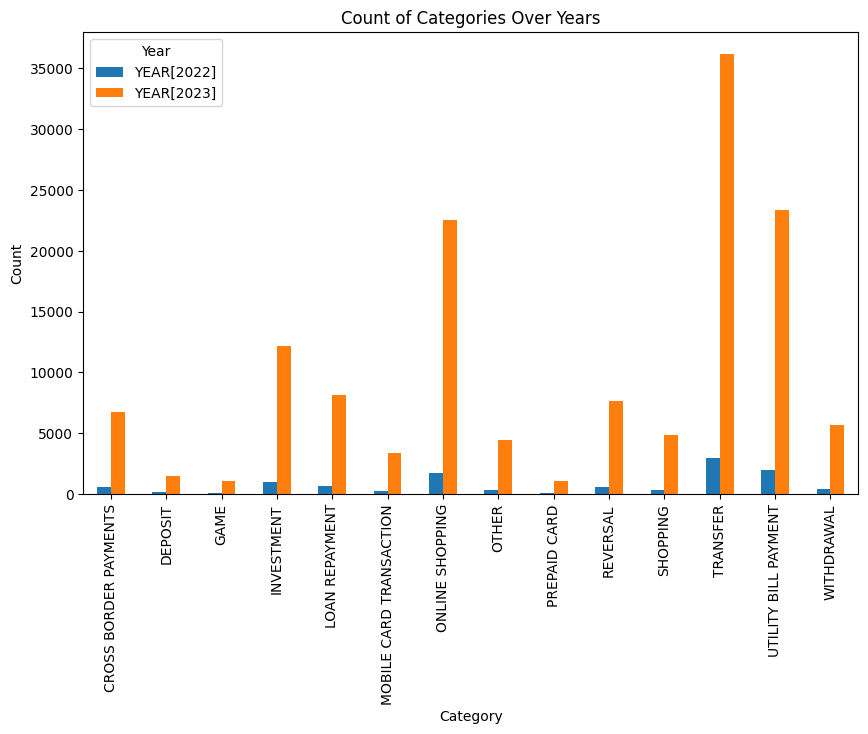

In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mengubah nama kolom
pivot_table.columns = [f'YEAR[{col}]' for col in pivot_table.columns]

# Menampilkan grafik bar
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Categories Over Years')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Year')
plt.show()

In [225]:
# Menambahkan kolom baru 'trx_month' untuk menyimpan bulan dari 'trx_date'
df_acc['trx_month'] = df_acc['trx_date'].dt.month

# Menghitung akumulasi COUNT category bulanan
result = df_acc.groupby(['trx_year', 'trx_month', 'CATEGORY']).size().reset_index(name='COUNT_CATEGORY')

# Membuat pivot table
pivot_table = result.pivot_table(index='CATEGORY', columns=['trx_year', 'trx_month'], values='COUNT_CATEGORY', fill_value=0)

# Menampilkan hasil
pivot_table

trx_year                 2022  2023                                            \
trx_month                  12    1     2     3     4     5     6     7     8    
CATEGORY                                                                        
CROSS BORDER PAYMENTS     545   596   596   578   544   644   617   643   596   
DEPOSIT                   132   141   112   133   124   139   141   130   140   
GAME                       84    98    88   109    94    81   108   116   112   
INVESTMENT                969  1104   957  1131  1034  1139  1080  1138  1153   
LOAN REPAYMENT            640   731   619   748   744   759   735   753   759   
MOBILE CARD TRANSACTION   267   328   298   361   307   277   297   274   298   
ONLINE SHOPPING          1751  2122  1897  1946  1980  2067  2051  2008  2099   
OTHER                     376   420   365   406   418   411   429   407   385   
PREPAID CARD               80   106    97    97    95   103    90    96    94   
REVERSAL                  608   726   636   722   712   760   659   702   701   
SHOPPING                  361   483   437   407   417   418   449   462   434   
TRANSFER                 2959  3253  3012  3310  3109  3335  3168  3277  3391   
UTILITY BILL PAYMENT     1968  2110  1908  2147  2090  2158  2048  2204  2277   
WITHDRAWAL                447   509   496   554   526   521   504   491   500   

trx_year                                        
trx_month                  9     10    11   12  
CATEGORY                                        
CROSS BORDER PAYMENTS     639   604   604   76  
DEPOSIT                   127   157   128   13  
GAME                       88   104    88   16  
INVESTMENT               1074  1159  1085  160  
LOAN REPAYMENT            743   741   700   91  
MOBILE CARD TRANSACTION   303   293   314   38  
ONLINE SHOPPING          1931  2059  2062  278  
OTHER                     386   418   381   39  
PREPAID CARD               95    95   110    8  
REVERSAL                  626   711   630   96  
SHOPPING                  391   442   443   55  
TRANSFER                 3268  3404  3234  409  
UTILITY BILL PAYMENT     2027  2037  2086  249  
WITHDRAWAL                492   534   490   66

In [232]:
import pandas as pd

# (Kode pembuatan DataFrame tetap sama)

reversal_df = pivot_table.reset_index()

# Menghapus tingkat indeks pertama ('trx_year')
reversal_df.columns = reversal_df.columns.droplevel(0)

# Menambahkan kolom 'CATEGORY' ke DataFrame hasil
reversal_df['CATEGORY'] = df['CATEGORY']

# Menampilkan hasil
reversal_df


trx_month,,12,1,2,3,4,5,6,7,8,9,10,11,12,CATEGORY
0,CROSS BORDER PAYMENTS,545,596,596,578,544,644,617,643,596,639,604,604,76,CROSS BORDER PAYMENTS
1,DEPOSIT,132,141,112,133,124,139,141,130,140,127,157,128,13,DEPOSIT
2,GAME,84,98,88,109,94,81,108,116,112,88,104,88,16,GAME
3,INVESTMENT,969,1104,957,1131,1034,1139,1080,1138,1153,1074,1159,1085,160,INVESTMENT
4,LOAN REPAYMENT,640,731,619,748,744,759,735,753,759,743,741,700,91,LOAN REPAYMENT
5,MOBILE CARD TRANSACTION,267,328,298,361,307,277,297,274,298,303,293,314,38,MOBILE CARD TRANSACTION
6,ONLINE SHOPPING,1751,2122,1897,1946,1980,2067,2051,2008,2099,1931,2059,2062,278,ONLINE SHOPPING
7,OTHER,376,420,365,406,418,411,429,407,385,386,418,381,39,OTHER
8,PREPAID CARD,80,106,97,97,95,103,90,96,94,95,95,110,8,PREPAID CARD
9,REVERSAL,608,726,636,722,712,760,659,702,701,626,711,630,96,REVERSAL


In [239]:
df = reversal_df

# Menghitung SUM untuk setiap bulan
sum_by_month = df.iloc[:, 1:14].sum()

# Menampilkan hasil SUM
print("\nJumlah (SUM) untuk setiap bulan:")
sum_by_month


Jumlah (SUM) untuk setiap bulan:


trx_year  trx_month
2022      12           11187
2023      1            12727
          2            11518
          3            12649
          4            12194
          5            12812
          6            12376
          7            12701
          8            12939
          9            12190
          10           12758
          11           12355
          12            1594
dtype: int64

In [193]:
# Membuat pivot table untuk tahun 2022
pivot_table_2022 = pivot_table[2022]

# Membuat pivot table untuk tahun 2023
pivot_table_2023 = pivot_table[2023]


In [194]:
pivot_table_2022

trx_month,12
CATEGORY,
CROSS BORDER PAYMENTS,545
DEPOSIT,132
GAME,84
INVESTMENT,969
LOAN REPAYMENT,640
MOBILE CARD TRANSACTION,267
ONLINE SHOPPING,1751
OTHER,376
PREPAID CARD,80


In [195]:
pivot_table_2023

trx_month,1,2,3,4,5,6,7,8,9,10,11,12
CATEGORY,,,,,,,,,,,,
CROSS BORDER PAYMENTS,596,596,578,544,644,617,643,596,639,604,604,76
DEPOSIT,141,112,133,124,139,141,130,140,127,157,128,13
GAME,98,88,109,94,81,108,116,112,88,104,88,16
INVESTMENT,1104,957,1131,1034,1139,1080,1138,1153,1074,1159,1085,160
LOAN REPAYMENT,731,619,748,744,759,735,753,759,743,741,700,91
MOBILE CARD TRANSACTION,328,298,361,307,277,297,274,298,303,293,314,38
ONLINE SHOPPING,2122,1897,1946,1980,2067,2051,2008,2099,1931,2059,2062,278
OTHER,420,365,406,418,411,429,407,385,386,418,381,39
PREPAID CARD,106,97,97,95,103,90,96,94,95,95,110,8


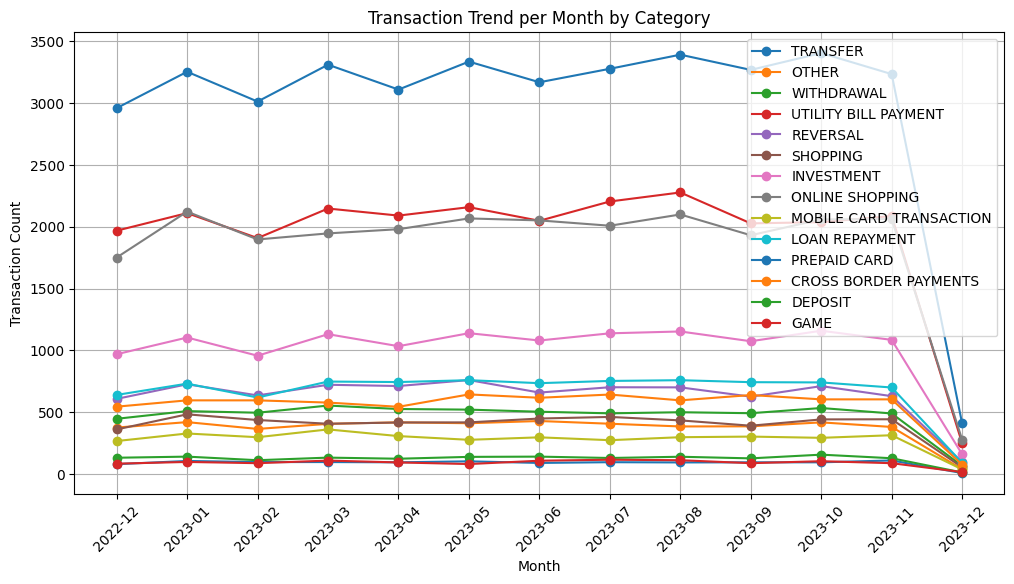

In [202]:
df = df_acc

# Menghitung jumlah transaksi per bulan untuk setiap kategori
transaction_count_per_month_category = df.groupby(['month_year', 'CATEGORY']).size().unstack(fill_value=0)

# Membuat DataFrame untuk visualisasi
visualization_data_category = pd.DataFrame(transaction_count_per_month_category.stack()).reset_index()
visualization_data_category.columns = ['Month', 'CATEGORY', 'Transaction Count']

# Mengonversi kolom 'Month' ke string
visualization_data_category['Month'] = visualization_data_category['Month'].astype(str)

# Membuat visualisasi tren menggunakan line chart
plt.figure(figsize=(12, 6))

# Looping untuk setiap kategori
for category in df['CATEGORY'].unique():
    category_data = visualization_data_category[visualization_data_category['CATEGORY'] == category]
    plt.plot(category_data['Month'], category_data['Transaction Count'], marker='o', label=category)

plt.title('Transaction Trend per Month by Category')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Menambahkan kolom baru 'trx_week' untuk menyimpan informasi minggu dari 'trx_date'
df_acc['trx_week'] = df_acc['trx_date'].dt.isocalendar().week

# Menghitung akumulasi COUNT category mingguan
result = df_acc.groupby(['trx_year', 'trx_week', 'CATEGORY']).size().reset_index(name='COUNT_CATEGORY')

# Membuat pivot table
pivot_table = result.pivot_table(index='CATEGORY', columns=['trx_year', 'trx_week'], values='COUNT_CATEGORY', fill_value=0)

# Menampilkan hasil
pivot_table

trx_year                2022                2023                           \
trx_week                  49   50   51   52   1    2    3    4    5    6    
CATEGORY                                                                    
CROSS BORDER PAYMENTS     87   58   54   63   82   65   69   57   61   58   
DEPOSIT                   31   37   34   30   34   27   32   25   40   21   
GAME                      27   21   16   20   29   17   15   26   28   28   
INVESTMENT               257  248  247  217  263  227  230  280  239  247   
LOAN REPAYMENT           164  161  180  146  165  175  168  155  129  161   
MOBILE CARD TRANSACTION   27   40   41   31   24   32   43   39   34   32   
ONLINE SHOPPING          484  431  437  399  467  493  506  441  488  457   
OTHER                     43   51   51   34   51   42   49   57   47   54   
PREPAID CARD             182  188  138  189  180  186  185  170  189  182   
REVERSAL                 150  167  157  134  153  170  168  175  144  157   
SHOPPING                  91   96   91   74  103  102  106  113  115   96   
TRANSFER                 771  780  747  661  739  727  774  728  681  762   
UTILITY BILL PAYMENT     498  504  484  471  483  483  451  470  452  491   
WITHDRAWAL               120  124  112   91  120  123  110   98  119  139   

trx_year                 ...                                                   
trx_week                 ...   41   42   43   44   45   46   47   48   49  52  
CATEGORY                 ...                                                   
CROSS BORDER PAYMENTS    ...   57   64   69   77   65   64   60   80   15  10  
DEPOSIT                  ...   41   29   43   32   24   33   27   32    2   3  
GAME                     ...   19   28   20   12   19   36   10   24    5   4  
INVESTMENT               ...  254  275  265  250  245  258  260  276   36  27  
LOAN REPAYMENT           ...  169  191  172  154  171  159  165  175   19  29  
MOBILE CARD TRANSACTION  ...   34   35   29   44   31   23   30   42    2   4  
ONLINE SHOPPING          ...  467  462  444  499  465  492  482  465   76  66  
OTHER                    ...   42   58   34   39   48   41   54   40    2   6  
PREPAID CARD             ...  158  176  181  201  178  174  194  148   21  19  
REVERSAL                 ...  173  160  149  152  133  147  169  148   25  28  
SHOPPING                 ...   93   92  112  105  102   94  112   94   11  18  
TRANSFER                 ...  750  767  797  760  756  768  718  730  113  99  
UTILITY BILL PAYMENT     ...  434  486  463  463  461  484  527  463   62  90  
WITHDRAWAL               ...  114  131  123  135  125  118  103   98   17  23  

[14 rows x 54 columns]

bingung akumulasi tuh gimana yah maksudnya, kalo ini udah bener bakal divisualisasiin